In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/old_tools/11_wt.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/cprofiles_merged.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [41]:
energy = 1000.0

oh, othbins, osbins = of[f"g_11_{int(energy)}"].to_numpy()
h ,  thbins, sbins  =  f[f"g_{energy}"]        .to_numpy()

osbins *= 1/10
sbins  *= 1/10

np.testing.assert_allclose(othbins, thbins)
np.testing.assert_allclose( osbins, sbins)
#np.testing.assert_allclose( oh, h)

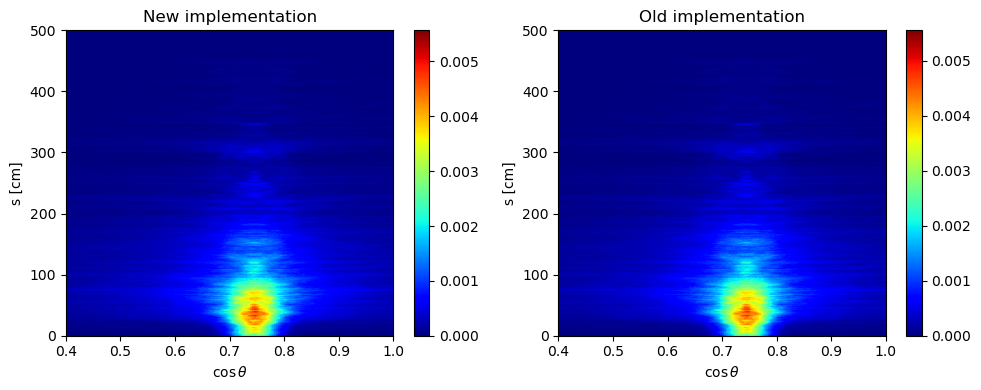

In [55]:
plt.figure(figsize=[10, 4])

plt.subplot(121)
plt.title("New implementation")
plt.imshow(h.T, origin="lower", extent=[othbins[0], othbins[-1], osbins[0], osbins[-1]], cmap="jet", aspect="auto")
plt.xlim([0.4, None])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.subplot(122)
plt.title("Old implementation")
plt.imshow(oh.T, origin="lower", extent=[othbins[0], othbins[-1], osbins[0], osbins[-1]], cmap="jet", aspect="auto")
plt.xlim([0.4, None])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.tight_layout()

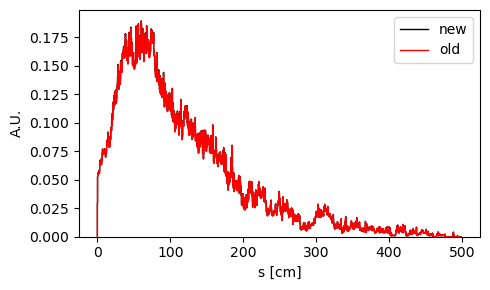

In [51]:
# s projections 
plt.figure(figsize=[5, 3])

plt.stairs( h.sum(axis=0),  sbins, label="new", color="k")
plt.stairs(oh.sum(axis=0), osbins, label="old", color="r")

plt.xlabel("s [cm]")
plt.ylabel("A.U.")
plt.legend()
plt.tight_layout()

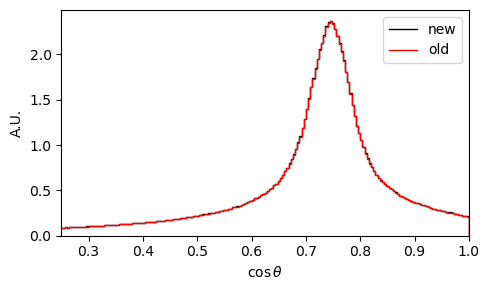

In [50]:
# th projections 
plt.figure(figsize=[5, 3])

plt.stairs( h.sum(axis=1),  thbins, label="new", color="k")
plt.stairs(oh.sum(axis=1), othbins, label="old", color="r")

plt.xlabel(r"$\cos \theta$")
plt.ylabel("A.U.")
plt.xlim([0.25, 1])
plt.legend()
plt.tight_layout()